# 1. Data Preperation

In [57]:
# load Data
import pandas as pd
df = pd.read_csv("HeteroticOrbifoldMSSMs.csv")

In [40]:
# check Data
df.head()

,Unnamed: 0,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13
0,0,Z2xZ2,7,3,238,47,1,1,9,6,1,6,0,12,42
1,1,Z2xZ2,7,3,214,47,1,1,5,2,1,6,0,12,50
2,2,Z2xZ2,7,3,250,51,1,1,7,4,1,8,0,16,48
3,3,Z2xZ2,7,3,250,35,1,1,7,4,1,10,0,12,46
4,4,Z2xZ2,7,3,234,51,1,1,7,4,1,6,0,20,42


In [41]:
# transform Orbifold Geometry to continuous variable and call it y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.Y0)

In [42]:
# save columns Y1, Y2, ..., Y13 as X
label = list(df)
X = df[label[2:]]

In [43]:
# check format of y
print(y)
# show how labels are encoded
{i:k for i,k in zip(le.classes_, le.transform(le.classes_))}

[2 2 2 ... 1 1 1]


{'Z12-I': 0,
 'Z12-II': 1,
 'Z2xZ2': 2,
 'Z2xZ4': 3,
 'Z2xZ6-I': 4,
 'Z3xZ3': 5,
 'Z3xZ6': 6,
 'Z4': 7,
 'Z4xZ4': 8,
 'Z6-I': 9,
 'Z6-II': 10,
 'Z6xZ6': 11,
 'Z8-I': 12,
 'Z8-II': 13}

In [44]:
# check format of X
X.head()

,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13
0,7,3,238,47,1,1,9,6,1,6,0,12,42
1,7,3,214,47,1,1,5,2,1,6,0,12,50
2,7,3,250,51,1,1,7,4,1,8,0,16,48
3,7,3,250,35,1,1,7,4,1,10,0,12,46
4,7,3,234,51,1,1,7,4,1,6,0,20,42


In [46]:
# split in trainings and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# 2. Adjust Hyper Parameter of Random Forest

In [47]:
# import RandomForestClassifier and train it on X_tr
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, max_features = 13, 
                            criterion = 'gini', n_jobs = 4, random_state = 13, oob_score = True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=True, random_state=13, verbose=0,
                       warm_start=False)

In [48]:
# print OBB error of our Random Forest model
print(rf.oob_score_)

0.8481471106130943


In [49]:
# this cell is to save the best values of your hyperparameters
# best work done with:
# max_features = 13
# n_estimators = 2000
rf.oob_score_

0.8481471106130943

## Random Froest with more trees, not shown in lecture, because it needs some calculation time (some minutes)

Increasing n_estimators needs more RAM, so take care that you donnot go to high if your RAM is limited

# 3. Test Final Model of Random Froest on Test Set

In [50]:
# Make predictions on test set, with adjusted hyper parameters
pred = rf.predict(X_test)

In [52]:
# plot confusion matrix and calculate accuracy
import numpy as np
np.set_printoptions(linewidth=200)            # for nicer print

from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred, y_test))
print("Accuracy:", sum(y_test==pred)/len(y_test))

[[  146     0     0     2     0     2     1     0     6     0     5     0     1     1]
 [    0    34     0     4     0     0     0     0     0     0     1     0     0     6]
 [    1     0   280    15     0     0     0     2     2     0     0     0     0     0]
 [   31    29    48 10225   101    21   104     6   768     2    61    22    28    73]
 [    0     0     0     3    43     0     0     0     0     0     0     0     0     2]
 [    0     0     0     5     0   584     9     0     9     0     0     0     0     0]
 [    1     0     0    33     2     7   509     0   133     1     2     4     1     0]
 [    0     0     0     0     0     0     0    33     1     0     0     0     1     0]
 [   30     4     7   722    61    36   399     1  8712     1    19   458     9    27]
 [    0     0     0     0     0     0     0     0     0     8     0     0     0     0]
 [    5     4     0     8     1     0     0     0     1     0   158     0     2     9]
 [    0     0     0     5     0     0     2

# Feature Importance

Can find out, which features are important for predictions with our Random Forest

In [53]:
print(rf.feature_importances_)

[0.071202   0.04923622 0.11070745 0.27477867 0.02639343 0.0192229  0.08032746 0.07625144 0.01881912 0.05259917 0.00140169 0.07512884 0.1439316 ]


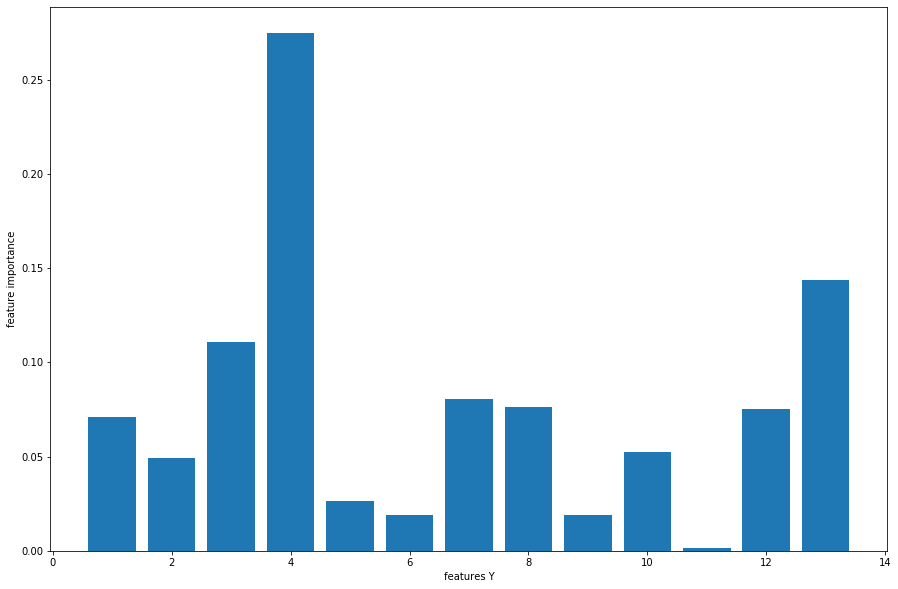

In [56]:
# plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.bar(range(1, 14), rf.feature_importances_)
plt.xlabel('features Y')
plt.ylabel('feature importance')
plt.show()